# Projeto Jogador de Forca

## Importações

In [15]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests

## Funções importantes

In [16]:
def huffman_tree(texto : str):
    """Monta a arvore de codificacao usando o algoritmo de huffman"""
    def get_prob(item):
        return item['prob']

    f = []

    # Calcula probabilidade de cada caractere      
    for c in set(texto):
        f.append(  {'prob':texto.count(c)/len(texto), 'valor':c} )
    f.sort(key=get_prob)
    
    while len(f) > 1:
        c1 = f.pop(0)
        c2 = f.pop(0)
        novo_node = {'valor':'NAO_FOLHA', 'prob':c1['prob']+c2['prob'], 'filho_0':c1, 'filho_1': c2}
        
        f.insert(0, novo_node)
        f.sort(key=get_prob)

    return f[0]

## Classe JogoDeForca

In [17]:
class JogoDeForca:
    def __init__(self):
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n')
        else:
            print("Erro: ", r.status_code)
    
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content)
        return len(self.palavra)

    def tentar_letra(self, letra):
        if self.vidas > 0:
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra]
            else:
                self.vidas -= 1
                if self.vidas == 0:
                    print("Fim de jogo!")
                    return False
                else:
                    return []
        
    def tentar_palavra(self, palavra):
        if self.vidas > 0:
            if self.palavra == palavra:
                print ("Ganhou!")
                return True
            else:
                self.vidas = 0
                print("Fim de jogo!")
                return False

## Testes do Funcionamento do Jogo

In [18]:
jogo = JogoDeForca()
print(jogo.novo_jogo())
print(jogo.palavra)
print(jogo.vidas)
print(jogo.tentar_letra('b'))
print(jogo.tentar_letra('a'))
print(jogo.tentar_letra('w'))
print(jogo.vidas)

8
cumuleis
5
[]
[]
[]
2


## Jogador

In [32]:
class Jogador:
    def __init__(self, jogo):
        self.jogo = jogo
        self.vitorias = 0
        self.derrotas = 0
    
    
    def filtrar_palavras(self, tamanho, letras_acertadas, letras_erradas):
        """Filtra palavras candidatas com base no tamanho e no padrão atual de acertos e erros."""
        palavras_possiveis = [palavra for palavra in self.jogo.content if len(palavra) == tamanho]

        for i, letra in enumerate(letras_acertadas):
            if letra != '_':
                palavras_possiveis = [p for p in palavras_possiveis if p[i] == letra]
        
        palavras_possiveis = [p for p in palavras_possiveis if all(letra not in p for letra in letras_erradas)]
        
        return palavras_possiveis
    

    def contar_frequencia_letras(self, palavras, letras_excluidas):
        """Conta a frequência das letras nas palavras candidatas, excluindo letras já tentadas."""
        frequencias = {}
        for palavra in palavras:
            for letra in palavra:
                if letra not in letras_excluidas:
                    frequencias[letra] = frequencias.get(letra, 0) + 1
        
        return sorted(frequencias, key=frequencias.get, reverse=True)
    

    def jogar(self, tentativas=100):
        for _ in range(tentativas):
            tamanho_palavra = self.jogo.novo_jogo()
            letras_acertadas = ['_'] * tamanho_palavra
            letras_tentadas = set()
            letras_erradas = set()
            venceu = False
            
            while self.jogo.vidas > 0:
                palavras_candidatas = self.filtrar_palavras(tamanho_palavra, letras_acertadas, letras_erradas)

                letras_frequentes = self.contar_frequencia_letras(palavras_candidatas, letras_tentadas)
                
                if not letras_frequentes:
                    break
                
                letra = letras_frequentes[0]
                letras_tentadas.add(letra)
                
                resultado = self.jogo.tentar_letra(letra)
                
                if resultado:
                    for idx in resultado:
                        letras_acertadas[idx] = letra
                    if "_" not in letras_acertadas:
                        venceu = True
                        break
                else:
                    letras_erradas.add(letra)
            
            if venceu:
                self.vitorias += 1
            else:
                self.derrotas += 1
    

    def mostrar_resultados(self):
        fig, ax = plt.subplots(figsize=(8, 6))
        
        resultados = ['Vitórias', 'Derrotas']
        valores = [self.vitorias, self.derrotas]
        cores = ['green', 'red']
        
        barras = ax.bar(resultados, valores, color=cores, edgecolor='black')
        
        for barra in barras:
            altura = barra.get_height()
            ax.annotate(f'{int(altura)}',
                        xy=(barra.get_x() + barra.get_width() / 2, altura),
                        xytext=(0, 5),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        ax.set_xlabel('Resultado', fontsize=14, fontweight='bold')
        ax.set_ylabel('Quantidade', fontsize=14, fontweight='bold')
        ax.set_title('Desempenho do Jogador no Jogo de Forca', fontsize=16, fontweight='bold')
        
        plt.show()

## Resultados

Fim de jogo!
Fim de jogo!
Fim de jogo!
Fim de jogo!
Fim de jogo!
Fim de jogo!
Fim de jogo!


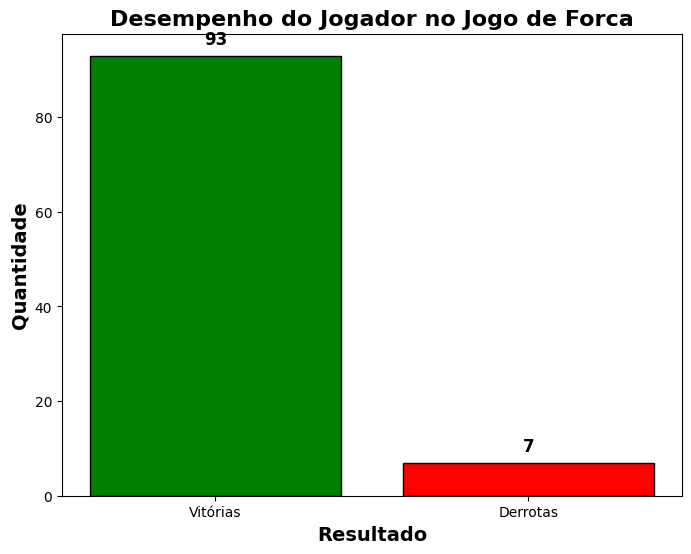

In [33]:
jogo = JogoDeForca()
jogador = Jogador(jogo)
jogador.jogar(100)
jogador.mostrar_resultados()